# **Importing Necessary Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with the actual filename)
file_path = '/content/SBT_normalized_dataset.csv'
data = pd.read_csv(file_path)

<ipython-input-2-7afc7c0d9e20>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['popularity'], ax=axs[0], kde=False)


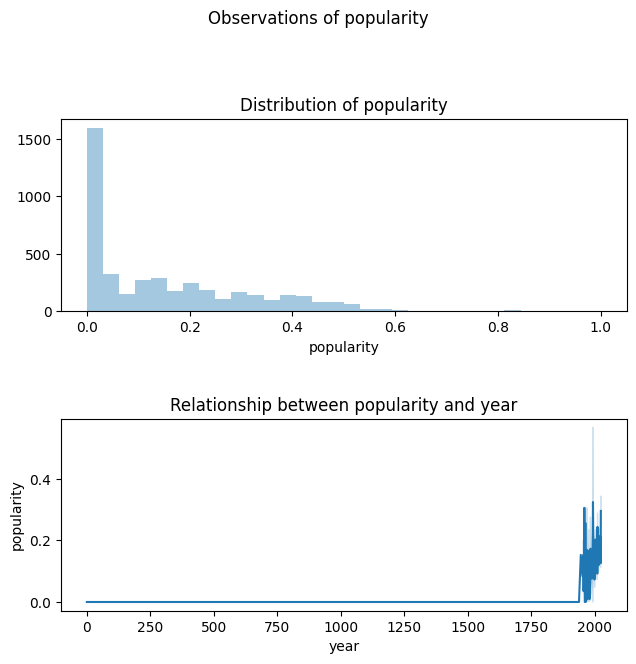

In [ ]:
# Analyzing our main feature
y = data.popularity

fig,axs = plt.subplots(2,1, figsize=(7,7))
fig.suptitle('Observations of popularity')

# Observe the distribution of 'popularity'axs[0].set_title('Distribution of popularity')
axs[0].set_title('Distribution of popularity')
sns.distplot(data['popularity'], ax=axs[0], kde=False)

axs[1].set_title('Relationship between popularity and year')
sns.lineplot(x='year', y='popularity', data=data, ax=axs[1])

fig.tight_layout(pad=3.0)

In [ ]:
# Set the predictor variables
data["loud_energy"] = data["energy"] * data["loudness"]
data["acoustic_energy"] = data['acousticness'] * data['energy']
features = ['valence', 'acousticness', 'danceability',
       'duration', 'energy', 'year', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'loud_energy', 'acoustic_energy']
# Removed 'mode' and 'key', as they had little/no correllation with popularity.
X = data[features]
X.head()

,valence,acousticness,danceability,duration,energy,year,instrumentalness,liveness,loudness,speechiness,tempo,loud_energy,acoustic_energy
0,0.127919,0.943719,0.592821,0.068110,0.335276,2023,0.000023,0.094133,0.667579,0.037683,0.651664,0.223823,0.316406
1,0.224365,0.175878,0.691282,0.080217,0.420523,2022,0.000006,0.087685,0.641521,0.031942,0.552365,0.269774,0.073961
2,0.294416,0.839196,0.552821,0.060626,0.356588,2017,0.001742,0.168279,0.569194,0.032046,0.497750,0.202967,0.299247
3,0.712690,0.002491,0.509744,0.049426,0.716858,2017,0.002941,0.080163,0.633394,0.091545,0.678935,0.454053,0.001786
4,0.684264,0.721608,0.673846,0.079339,0.289608,2019,0.010246,0.154309,0.554558,0.034134,0.425175,0.160604,0.208983


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Observing the Datatypes of the Columns**

In [ ]:
print(X_train.dtypes)


valence             float64
acousticness        float64
danceability        float64
duration            float64
energy              float64
year                  int64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
loud_energy         float64
acoustic_energy     float64
dtype: object


# **Applying Linear Regression Model**

In [ ]:

# Create a Linear Regression model
linear_reg_model_encoded = LinearRegression()

# Train the Linear Regression model on the training set
linear_reg_model_encoded.fit(X_train_encoded, y_train_encoded)

# Make predictions using the Linear Regression model
y_pred_lr_encoded = linear_reg_model_encoded.predict(X_test_encoded)

# Evaluate the Linear Regression model
mse_lr_encoded = mean_squared_error(y_test_encoded, y_pred_lr_encoded)
r2_lr_encoded = r2_score(y_test_encoded, y_pred_lr_encoded)

print(f'Linear Regression Mean Squared Error: {mse_lr_encoded}')
print(f'Linear Regression R-squared: {r2_lr_encoded}')


Linear Regression Mean Squared Error: 0.02456383553906862
Linear Regression R-squared: 0.17433282021342278


# **Converting Object type features into Numeric Values**

In [ ]:
# Assuming you have a DataFrame 'data' with object-type columns 'categorical_column1', 'categorical_column2', 'categorical_column3'
# Replace these with the actual names of your object-type columns

# Identify object-type columns
object_columns = ['id', 'title', 'artist']

# Create a new DataFrame with one-hot encoded object-type columns
data_encoded = pd.get_dummies(data, columns=object_columns, drop_first=True)

# Assuming the target variable is in a column named 'target'
X_encoded = data_encoded.drop('popularity', axis=1)  # Features
y_encoded = data_encoded['popularity']  # Target variable

# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

# **Applying Random Forest Model**

In [ ]:
# Create a Random Forest Regressor model
rf_model_encoded = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model on the training set
rf_model_encoded.fit(X_train_encoded, y_train_encoded)

# Make predictions using the Random Forest model
y_pred_rf_encoded = rf_model_encoded.predict(X_test_encoded)

# Evaluate the Random Forest model
mse_rf_encoded = mean_squared_error(y_test_encoded, y_pred_rf_encoded)
r2_rf_encoded = r2_score(y_test_encoded, y_pred_rf_encoded)

print(f'Random Forest Mean Squared Error: {mse_rf_encoded}')
print(f'Random Forest R-squared: {r2_rf_encoded}')


Random Forest Mean Squared Error: 4.6076868017795964e-05
Random Forest R-squared: 0.9984512126532868


# **Applying KNN Regression Model**

In [ ]:

# Create a KNN Regressor
knn_model_encoded = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Train the model on the training set
knn_model_encoded.fit(X_train_encoded, y_train_encoded)

# Make predictions using the KNN model
y_pred_knn_encoded = knn_model_encoded.predict(X_test_encoded)

# Evaluate the KNN model
mse_knn_encoded = mean_squared_error(y_test_encoded, y_pred_knn_encoded)
r2_knn_encoded = r2_score(y_test_encoded, y_pred_knn_encoded)

print(f'KNN Regression Mean Squared Error: {mse_knn_encoded}')
print(f'KNN Regression R-squared: {r2_knn_encoded}')


KNN Regression Mean Squared Error: 0.021034544340088977
KNN Regression R-squared: 0.29296331284444443


# **Applying SVR Model**

In [ ]:
# Create an SVR model
svr_model_encoded = SVR(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter as needed

# Train the model on the training set
svr_model_encoded.fit(X_train_encoded, y_train_encoded)

# Make predictions using the SVR model
y_pred_svr_encoded = svr_model_encoded.predict(X_test_encoded)

# Evaluate the SVR model
mse_svr_encoded = mean_squared_error(y_test_encoded, y_pred_svr_encoded)
r2_svr_encoded = r2_score(y_test_encoded, y_pred_svr_encoded)

print(f'SVR Mean Squared Error: {mse_svr_encoded}')
print(f'SVR R-squared: {r2_svr_encoded}')


SVR Mean Squared Error: 2.6964665793912417
SVR R-squared: -89.6366577993765


# **Generating Bar Chart of Comparison**

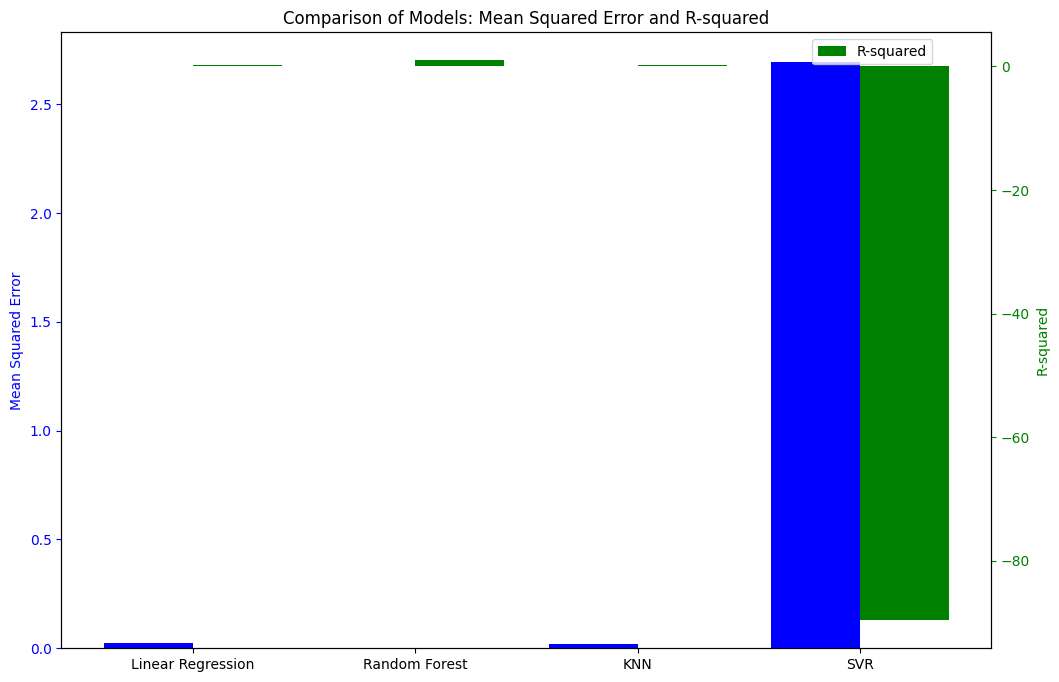

In [ ]:
# Mean Squared Error values
mse_values = [mse_lr_encoded, mse_rf_encoded, mse_knn_encoded, mse_svr_encoded]

# R-squared values
r2_values = [r2_lr_encoded, r2_rf_encoded, r2_knn_encoded, r2_svr_encoded]

# Model names
models = ['Linear Regression', 'Random Forest', 'KNN', 'SVR']

# Create an array of indices for better visualization
indices = np.arange(len(models))

# Set up figure and axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Mean Squared Error on the primary y-axis (left)
ax1.bar(indices - 0.2, mse_values, width=0.4, label='Mean Squared Error', color='blue', align='center')
ax1.set_ylabel('Mean Squared Error', color='blue')
ax1.tick_params('y', colors='blue')

# Create a secondary y-axis (right) for R-squared
ax2 = ax1.twinx()
ax2.bar(indices + 0.2, r2_values, width=0.4, label='R-squared', color='green', align='center')
ax2.set_ylabel('R-squared', color='green')
ax2.tick_params('y', colors='green')

# Set labels, title, and legend
plt.title('Comparison of Models: Mean Squared Error and R-squared')
plt.xlabel('Models')
plt.xticks(indices, models)
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1))

# Show the plot
plt.show()


# Generating Line Graph of **Comparison**

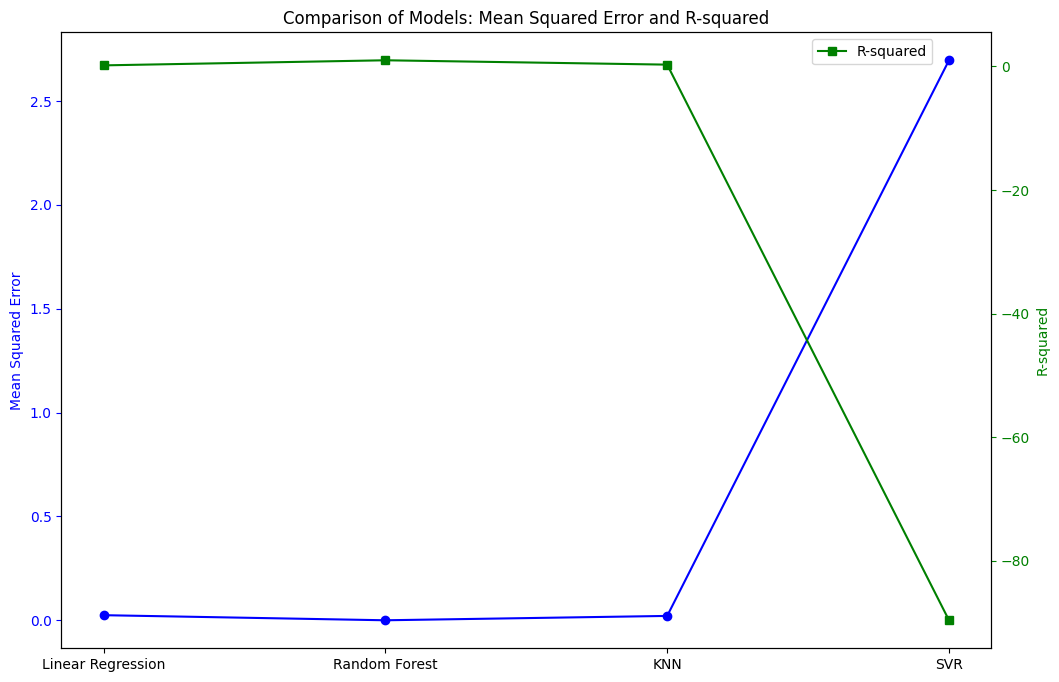

In [ ]:
# Mean Squared Error values
mse_values = [mse_lr_encoded, mse_rf_encoded, mse_knn_encoded, mse_svr_encoded]

# R-squared values
r2_values = [r2_lr_encoded, r2_rf_encoded, r2_knn_encoded, r2_svr_encoded]

# Model names
models = ['Linear Regression', 'Random Forest', 'KNN', 'SVR']

# Create an array of indices for better visualization
indices = np.arange(len(models))

# Set up figure and axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Mean Squared Error on the primary y-axis (left)
ax1.plot(models, mse_values, marker='o', color='blue', label='Mean Squared Error')
ax1.set_ylabel('Mean Squared Error', color='blue')
ax1.tick_params('y', colors='blue')

# Create a secondary y-axis (right) for R-squared
ax2 = ax1.twinx()
ax2.plot(models, r2_values, marker='s', color='green', label='R-squared')
ax2.set_ylabel('R-squared', color='green')
ax2.tick_params('y', colors='green')

# Set labels, title, and legend
plt.title('Comparison of Models: Mean Squared Error and R-squared')
plt.xlabel('Models')
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1))

# Show the plot
plt.show()


# **Applying k-fold Cross Validation**

In [ ]:
# Assuming the target variable is in a column named 'popularity'
X = data.drop('popularity', axis=1)  # Features
y = data['popularity']  # Target variable

# Identify object-type columns
object_columns = ['id', 'title', 'artist']

# Create a new DataFrame with one-hot encoded object-type columns
X_encoded = pd.get_dummies(X, columns=object_columns, drop_first=True)

# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Values of k for cross-validation
k_values = [3, 5, 8, 10]

# Iterate over different values of k and compare cross-validation scores
for k in k_values:
    # Create K-fold cross-validation object
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)

    # Perform cross-validation and get MSE scores
    mse_scores = -cross_val_score(linear_reg_model, X_encoded, y, scoring='neg_mean_squared_error', cv=kfold)

    # Print cross-validation score for the current k
    print(f"Cross-validation score for k = {k}: {mse_scores.mean()}")


Cross-validation score for k = 3: 0.02306994515291376
Cross-validation score for k = 5: 0.022933552765047483
Cross-validation score for k = 8: 0.02299005717112252
Cross-validation score for k = 10: 0.022757705405917213
